# Player Plateaus

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

import sys
sys.path.insert(0, '../load_data')
from load import load_stats, load_history

pd.options.mode.chained_assignment = None

## Load Data

In [2]:
players = load_stats()
history = load_history()

c:\Users\hsu_s\Projects\Personal\tt-ds-proj\analysis\progression_analysis\../load_data\load.py:21: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  history = pd.read_csv(


## Functions

In [59]:
def is_plateau(player):
    phist = history[history['Database#'] == player['Database#']]
    if len(phist) == 0:
        return pd.NA
    scope = phist[phist['Start Date'] > phist.loc[phist.index[0], 'Start Date'] - timedelta(365)]
    if len(scope) == 0:
        return pd.NA
    rhist = scope['Final Rating']

    rbase = rhist.iloc[-1]
    rlimit = 50
    for rating in rhist:
        if rating > rbase + rlimit:
            return False
    return True


## Test Functions

In [ ]:
me = players[players['Database#'] == 102103]
me_hist = history[history['Database#'] == 102103]

# Plateau defined as not gaining more than fifty points in the last year
print('Rating history in the last year:')
print(me_hist[me_hist['Start Date'] > me_hist.loc[me_hist.index[0], 'Start Date'] - timedelta(365)]['Final Rating'].values)
print(f'Plateau: {me.apply(is_plateau, axis=1).iloc[0]}')

Rating history in the last year:
[2509. 2499. 2497. 2494. 2519. 2500. 2494. 2484. 2487. 2483.]
Plateau: True


## Analysis

In [62]:
players['Plateau'] = players.apply(is_plateau, axis=1)

In [ ]:
adult_plateau_count = len(players[(players['Plateau'] == True) & (players['Age'] > timedelta(19*365))])
adult_improving_count = len(players[(players['Plateau'] == False) & (players['Age'] > timedelta(19*365))])
junior_plateau_count = len(players[(players['Plateau'] == True) & (players['Age'] <= timedelta(19*365))])
junior_improving_count = len(players[(players['Plateau'] == False) & (players['Age'] <= timedelta(19*365))])

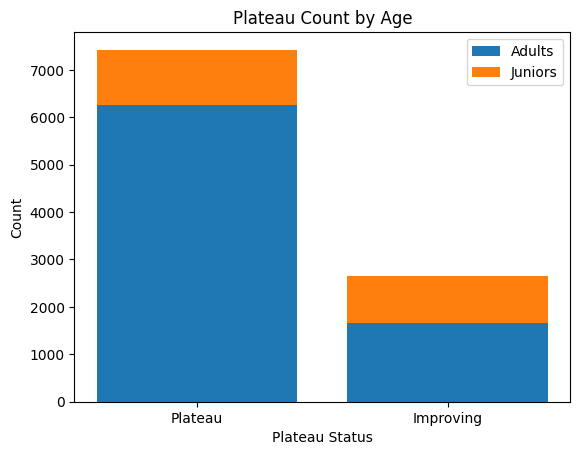

In [103]:
plateau_labels = ['Plateau', 'Improving']
age_labels = ['Adults', 'Juniors']
adult_counts = [adult_plateau_count, adult_improving_count]
junior_counts = [junior_plateau_count, junior_improving_count]
plateau_counts = [adult_plateau_count, junior_plateau_count]
improving_counts = [adult_improving_count, junior_improving_count]
plt.bar(plateau_labels, adult_counts, label='Adults')
plt.bar(plateau_labels, junior_counts, bottom=adult_counts, label='Juniors')
plt.xlabel('Plateau Status')
plt.ylabel('Count')
plt.title('Plateau Count by Age')
plt.legend()
plt.show()

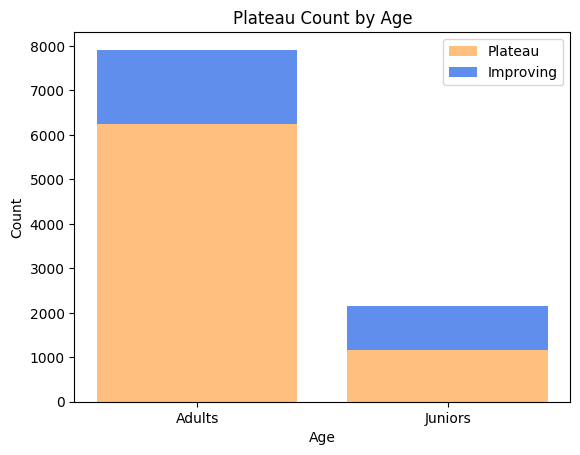

In [141]:
plt.bar(age_labels, plateau_counts, label='Plateau', color='#FF800080')
plt.bar(age_labels, improving_counts, bottom=plateau_counts, label='Improving', color='#2A69E6BF')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Plateau Count by Age')
plt.legend()
plt.show()